Send an email if you want raw datas  
extract data with its default name `faces.mat` in `__data__` directory

In [52]:
import numpy as np
import scipy.io as sio
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [51]:
 class PCA():
    def __init__(self, n_components):
        self._n_components = n_components

    def fit(self, X):
        mean_removed_X = X - X.mean(axis=0)
        covariance_matrix = np.cov(mean_removed_X , rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort eigenvalues and corresponding eigenvectors in descending order
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Select the first n_components, eigen values[0] is for vectors[:, 0]
        eigenvalues = eigenvalues[:self._n_components]
        eigenvectors = eigenvectors[:, :self._n_components]

        self._components = eigenvectors
        self._singular_values = eigenvalues

    def transform(self, X):
        # Project the data onto principal components
        return X @ self._components

In [53]:
data = sio.loadmat('./__data__/faces.mat')
faces = data['faces'].T

X, X_test = train_test_split(faces, test_size=0.3, shuffle=False) 

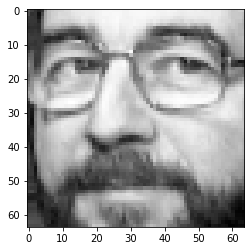

In [58]:
plt.imshow(X[-1].reshape(64,64).T, cmap='gray')
plt.show()

In [60]:
pca = PCA(n_components=100)
pca.fit(X)

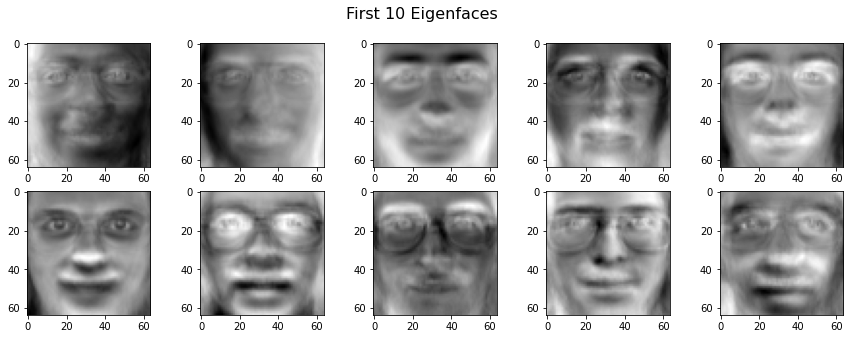

In [92]:
eigen_faces = np.real(pca._components)
fig, axs = plt.subplots(figsize=(15,5))
for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(eigen_faces[:,i].reshape(64,64).T, cmap='gray')
fig.suptitle("First 10 Eigenfaces", fontsize=16)
plt.show()

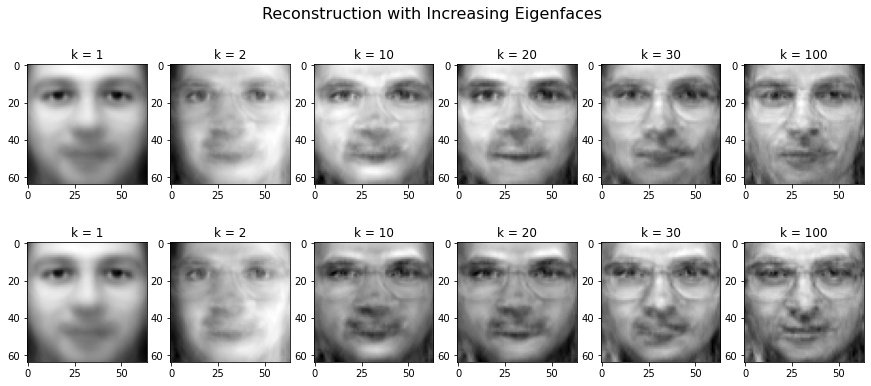

In [105]:
fig, axs = plt.subplots(figsize=(15,6))
mean_faces = np.mean(X, axis=0)

first_img = X_test[0,:] 
second_img = X_test[20,:] 

def construct(image, k):
    weight = image @ eigen_faces[:,:k] # Get PC scores of the images
    projected_face = weight @ eigen_faces[:,:k].T # Reconstruct first face in dataset using k PCs
    img = projected_face.reshape(64,64)+mean_faces.reshape(64,64)
    return img.T


for i, k in enumerate([0,1,9,19,29,99]):
    # first image
    ax = plt.subplot(2,6,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(construct(first_img, k),cmap='gray')
    # second image
    ax = plt.subplot(2,6,i+7)
    ax.set_title("k = "+str(k+1))
    plt.imshow(construct(second_img, k),cmap='gray')
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=16)
plt.show()